In [307]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Lab 12 

part 1

In [308]:
part1

,Time (s),Signal strength,Ax (m/s²),Ay (m/s²),Az (m/s²),Bx (µT),By (µT),Bz (µT),ωx (rad/s),ωy (rad/s),ωz (rad/s),Voltage (mV)
0,0.010000,34,0.113532,-9.838487,-0.298323,-38.520168,40.934483,-0.042778,-0.013742,-1.270920,-0.094810,-0.005756
1,0.020000,47,0.123074,-9.819469,-0.303002,-38.659176,40.868134,-0.188031,-0.044923,-1.258368,-0.101104,-0.006802
2,0.030000,47,0.113713,-9.838126,-0.298412,-38.672882,40.861591,-0.202353,-0.072023,-1.223099,-0.108735,-0.005757
3,0.040000,34,0.129950,-9.817666,-0.307882,-38.557365,40.916729,-0.081647,-0.089319,-1.166625,-0.116206,-0.006802
4,0.050000,47,0.305932,-9.782021,-0.430794,-38.747280,40.826084,-0.280091,-0.098429,-1.099071,-0.122158,-0.004711
...,...,...,...,...,...,...,...,...,...,...,...,...
6443,64.440002,32,0.603655,-9.877784,-0.278809,24.749588,41.420422,-19.070927,-0.088110,6.000289,0.023040,0.001048
6444,64.449997,33,0.594655,-9.825982,-0.297569,25.851871,41.290524,-17.958000,-0.091132,5.999344,0.028652,0.002616
6445,64.459999,26,0.579981,-9.833507,-0.335709,26.838638,41.212963,-16.022655,-0.095178,5.998481,0.033607,0.002093
6446,64.470001,22,0.560309,-9.838576,-0.303712,27.616892,41.327908,-13.815224,-0.100956,5.996842,0.037847,0.003140


In [309]:
part1 = pd.read_csv('part1.csv')
part1.head()

n = len(part1)
x, y = [], []
for i in range(n - 200):
    if part1['Voltage (mV)'][i] == max(part1['Voltage (mV)'][i:i + 100]):
        x.append(part1['ωy (rad/s)'][i])
        y.append(part1['Voltage (mV)'][i])
        
print(len(x))
print(n)
# for gyro, gain in zip(part1['ωy (rad/s)'], part1['Voltage (mV)'])

395
6448


In [310]:
x_points = []
y_points = []
for i in range(-19, 20):
    x_points.append(i + 0.5)
    temp = part1[(i <= part1['ωy (rad/s)']) & (part1['ωy (rad/s)'] <= i + 1)]
    if i >= 0:
        y_points.append(min(temp['Voltage (mV)']))
    else:
        y_points.append(max(temp['Voltage (mV)']))

x_points = np.array(x_points)
y_points = np.array(y_points)

In [311]:
len(x_points)

39

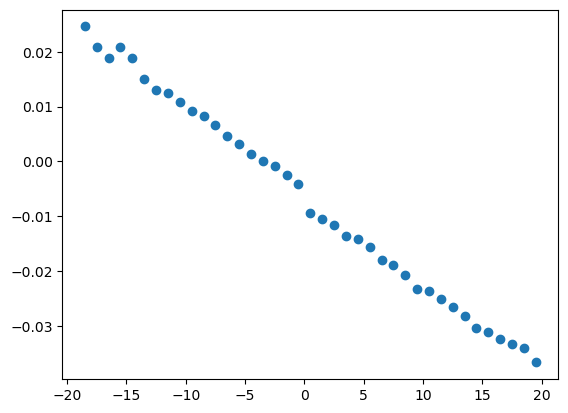

In [312]:
plt.scatter(x_points, y_points)

In [313]:
part1

,Time (s),Signal strength,Ax (m/s²),Ay (m/s²),Az (m/s²),Bx (µT),By (µT),Bz (µT),ωx (rad/s),ωy (rad/s),ωz (rad/s),Voltage (mV)
0,0.010000,34,0.113532,-9.838487,-0.298323,-38.520168,40.934483,-0.042778,-0.013742,-1.270920,-0.094810,-0.005756
1,0.020000,47,0.123074,-9.819469,-0.303002,-38.659176,40.868134,-0.188031,-0.044923,-1.258368,-0.101104,-0.006802
2,0.030000,47,0.113713,-9.838126,-0.298412,-38.672882,40.861591,-0.202353,-0.072023,-1.223099,-0.108735,-0.005757
3,0.040000,34,0.129950,-9.817666,-0.307882,-38.557365,40.916729,-0.081647,-0.089319,-1.166625,-0.116206,-0.006802
4,0.050000,47,0.305932,-9.782021,-0.430794,-38.747280,40.826084,-0.280091,-0.098429,-1.099071,-0.122158,-0.004711
...,...,...,...,...,...,...,...,...,...,...,...,...
6443,64.440002,32,0.603655,-9.877784,-0.278809,24.749588,41.420422,-19.070927,-0.088110,6.000289,0.023040,0.001048
6444,64.449997,33,0.594655,-9.825982,-0.297569,25.851871,41.290524,-17.958000,-0.091132,5.999344,0.028652,0.002616
6445,64.459999,26,0.579981,-9.833507,-0.335709,26.838638,41.212963,-16.022655,-0.095178,5.998481,0.033607,0.002093
6446,64.470001,22,0.560309,-9.838576,-0.303712,27.616892,41.327908,-13.815224,-0.100956,5.996842,0.037847,0.003140


In [314]:
gyroscope = part1['ωy (rad/s)']
high_gain = part1['Voltage (mV)']
x = np.linspace(min(gyroscope), max(gyroscope))
y = -0.0016*x-0.005

(-25.0, 25.0)

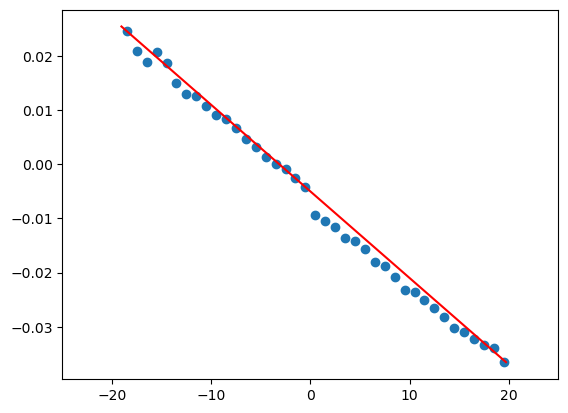

In [315]:
plt.scatter(x_points, y_points)
plt.plot(x,y, color = 'red')
plt.xlim(-25,25)

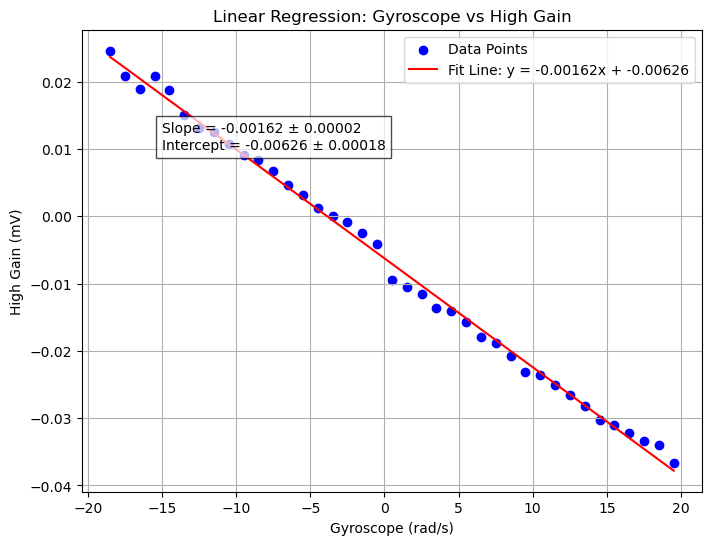

In [316]:

model = LinearRegression()
model.fit(x_points.reshape(-1, 1), np.array(y_points))

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Generate predictions for the line
x_fit = np.linspace(min(x_points), max(x_points), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)

# Calculate standard errors manually using sklearn outputs

# Predictions and residuals
y_pred = model.predict(x_points.reshape(-1, 1))
residuals = y_points - y_pred

# Residual variance
n = len(x_points)
residual_variance = np.sum(residuals**2) / (n - 2)

X_design = np.hstack([np.ones_like(x_points).reshape(-1, 1), x_points.reshape(-1, 1)])  # Add intercept column
cov_matrix = residual_variance * np.linalg.inv(X_design.T @ X_design)

intercept_error = np.sqrt(cov_matrix[0, 0])
slope_error = np.sqrt(cov_matrix[1, 1])

plt.figure(figsize=(8, 6))
plt.scatter(x_points, y_points, label='Data Points', color='blue')
plt.plot(x_fit, y_fit, label=f'Fit Line: y = {slope:.5f}x + {intercept:.5f}', color='red')

# Display slope, intercept, and their manually calculated errors on the plot
plt.text(
    -15, 0.01,
    f"Slope = {slope:.5f} ± {slope_error:.5f}\nIntercept = {intercept:.5f} ± {intercept_error:.5f}",
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
)

plt.xlabel('Gyroscope (rad/s)')
plt.ylabel('High Gain (mV)')
plt.title('Linear Regression: Gyroscope vs High Gain')
plt.legend()
plt.grid(True)
plt.show()

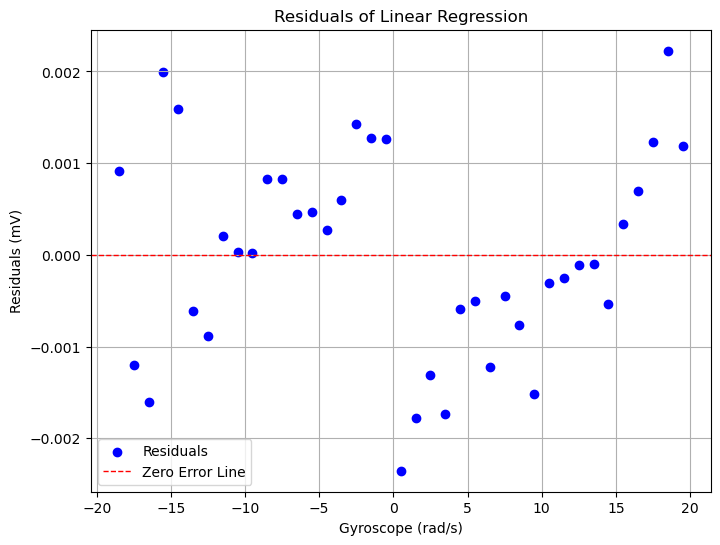

In [317]:
residuals = y_points - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(x_points, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Error Line')
plt.xlabel('Gyroscope (rad/s)')
plt.ylabel('Residuals (mV)')
plt.title('Residuals of Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

## PART 2

In [398]:
part2 = pd.read_csv('part2.csv')

print(part2.columns)
part2

Index(['Time (s)', 'Signal strength', 'Ax (m/s²)', 'Ay (m/s²)', 'Az (m/s²)',
       'Bx (µT)', 'By (µT)', 'Bz (µT)', 'ωx (rad/s)', 'ωy (rad/s)',
       'ωz (rad/s)', 'Voltage (mV)'],
      dtype='object')


,Time (s),Signal strength,Ax (m/s²),Ay (m/s²),Az (m/s²),Bx (µT),By (µT),Bz (µT),ωx (rad/s),ωy (rad/s),ωz (rad/s),Voltage (mV)
0,0.01,40,-0.009404,0.312416,9.783384,-5.648405,-58.835632,185.664322,0.015215,-1.258650,-0.105362,-0.001570
1,0.02,40,-0.023467,0.331736,9.839955,-5.998260,-57.833721,183.617126,0.014116,-1.289408,-0.072407,-0.002100
2,0.03,40,-0.004676,0.330843,9.821001,-6.205700,-57.367817,179.896851,-0.013937,-1.308520,-0.095443,-0.005233
3,0.04,40,-0.013653,0.308002,9.816365,-6.032380,-57.801151,176.040939,-0.072491,-1.310441,-0.100454,-0.005235
4,0.05,40,-0.004019,0.321362,9.816951,-5.556429,-57.801151,175.742538,-0.128291,-1.280294,-0.114040,-0.005759
...,...,...,...,...,...,...,...,...,...,...,...,...
969,9.70,40,-0.020232,0.317365,9.842309,23.890959,-72.706390,161.609360,-0.005586,0.000245,0.000673,-0.003666
970,9.71,42,-0.009702,0.317067,9.781149,24.078867,-72.815903,160.637695,-0.000351,-0.000526,0.002999,-0.004184
971,9.72,42,-0.037590,0.326489,9.787143,24.213123,-72.617882,159.754379,0.001718,-0.004020,0.004810,-0.004708
972,9.73,42,-0.000367,0.298223,9.871999,24.187904,-72.332062,159.506104,0.001461,0.001280,0.002164,-0.004710


In [399]:
y = part2['By (µT)']/1000
time = part2['Time (s)']
x = part2['Voltage (mV)']


dy_dt = [(y[i+1] - y[i-1]) / (time[i+1] - time[i-1]) for i in range(1, len(y)-1)]
dy_dt.insert(0, (y[1] - y[0]) / (time[1] - time[0]))  # Forward difference for the first point
dy_dt.append((y[len(y)-1] - y[len(y)-2]) / (time[len(time)-1] - time[len(time)-2])) # Backward difference for the last point

dy_dt = np.array(dy_dt)  # Convert to a NumPy array

# Create a DataFrame and group by rounded x values
data = pd.DataFrame({'x': x, 'dy_dt': dy_dt})
data


,x,dy_dt
0,-0.001570,0.100191
1,-0.002100,0.073391
2,-0.005233,0.001628
3,-0.005235,-0.021667
4,-0.005759,-0.012816
...,...,...
969,-0.003666,-0.014562
970,-0.004184,0.004425
971,-0.004708,0.024193
972,-0.004710,0.005205


In [400]:
data = data[(data['dy_dt'] > -1) & (data['dy_dt'] < 1)]
data

,x,dy_dt
0,-0.001570,0.100191
1,-0.002100,0.073391
2,-0.005233,0.001628
3,-0.005235,-0.021667
4,-0.005759,-0.012816
...,...,...
969,-0.003666,-0.014562
970,-0.004184,0.004425
971,-0.004708,0.024193
972,-0.004710,0.005205


In [401]:
x = data['x']
dy_dt = data['dy_dt']

ValueError: x and y must be the same size

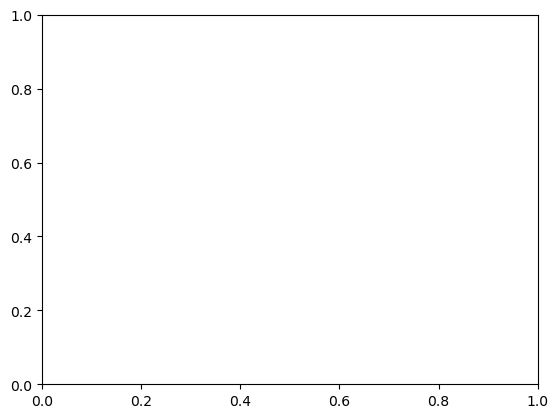

In [402]:
plt.scatter(x,y)

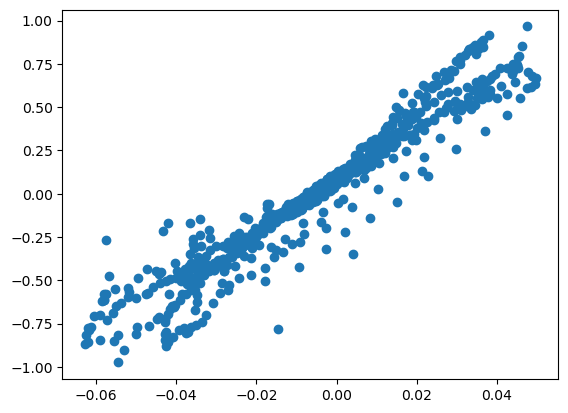

In [403]:
plt.scatter(x, dy_dt)

0.05940316400528975


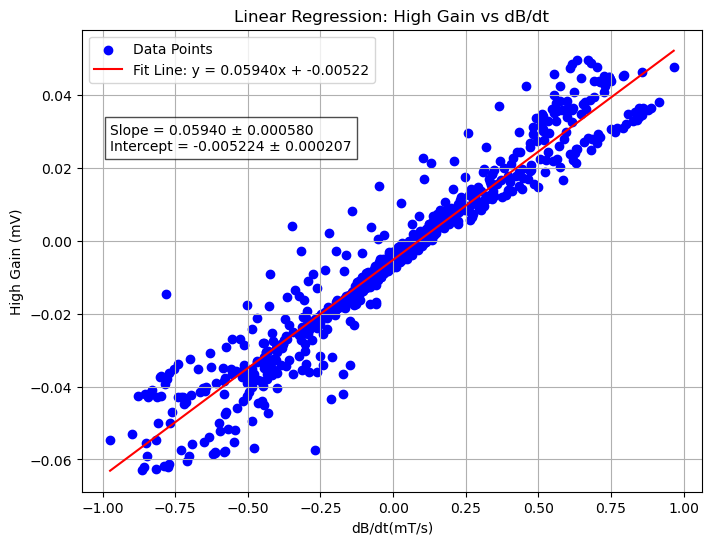

In [404]:
y = np.array(x)
x = np.array(dy_dt).reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(slope)
# Generate predictions
x_fit = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)

# Calculate residuals and residual variance
y_pred = model.predict(x)
residuals = y - y_pred
n = len(x)
residual_variance = np.sum(residuals**2) / (n - 2)

# Design matrix for covariance calculation
X_design = np.hstack([np.ones_like(x), x])
cov_matrix = residual_variance * np.linalg.inv(X_design.T @ X_design)

# Calculate standard errors
intercept_error = np.sqrt(cov_matrix[0, 0])
slope_error = np.sqrt(cov_matrix[1, 1])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points', color='blue')
plt.plot(x_fit, y_fit, label=f'Fit Line: y = {slope:.5f}x + {intercept:.5f}', color='red')

# Display slope and intercept with errors
plt.text(
    x.min(), y.max() * 0.5,
    f"Slope = {slope:.5f} ± {slope_error:.6f}\nIntercept = {intercept:.6f} ± {intercept_error:.6f}",
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
)

plt.ylabel('High Gain (mV)')
plt.xlabel('dB/dt(mT/s)')
plt.title('Linear Regression: High Gain vs dB/dt')
plt.legend()
plt.grid(True)
plt.show()

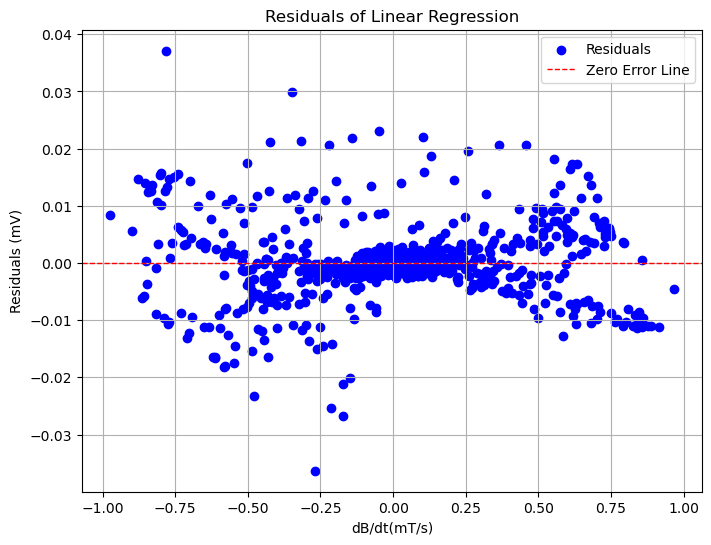

In [405]:
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(x, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Error Line')
plt.xlabel('dB/dt(mT/s)')
plt.ylabel('Residuals (mV)')
plt.title('Residuals of Linear Regression')
plt.legend()
plt.grid(True)
plt.show()